In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from Logistic_Regression_Scratch import *

In [2]:
dt = pd.read_csv('dataset/ex2data1.txt', header=None)

In [3]:
dt.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
def plotdata(dt):
    plt.plot(dt[0][dt[2] == 0], dt[1][dt[2] == 0], 'kx', label = 'Not Admited')
    plt.plot(dt[0][dt[2] == 1], dt[1][dt[2] == 1], 'yo', label = 'Admited')
    plt.legend()
    plt.show()

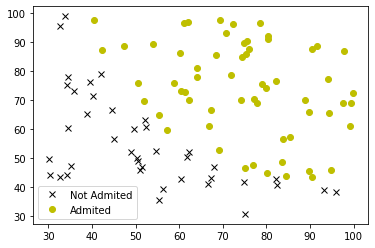

In [5]:
plotdata(dt)

In [6]:
reg = LogisticRegression()
reg.sigmoid(0.9)

0.7109495026250039

In [11]:
def plot_sigmoid():
    x = np.arange(-5, 5, 0.1)
    y = reg.sigmoid(x)
    plt.annotate('(0,0.5)', xy=(0,0.5), xytext = (-1, 0.55))
    plt.axhline(y=0.5, c = 'black', ls = ':')
    plt.axvline(x=0, c = 'black', ls = ':')
    plt.plot(x, y)

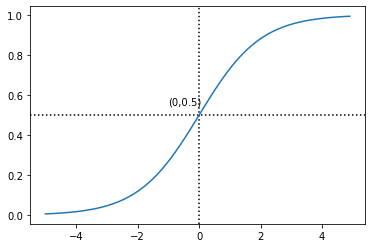

In [12]:
plot_sigmoid()

In [13]:
def appendone():
    X = dt[[0, 1]].values
    y = dt[2].values
    m, n = X.shape
    X0 = np.ones((m, 1))
    X = np.append(X0, X, axis=1)
    return X, y

In [14]:
X, y = appendone()

In [15]:
initialtheta = np.zeros((X.shape[1]))

In [16]:
hypothesis = reg.hypothesis(X, initialtheta)

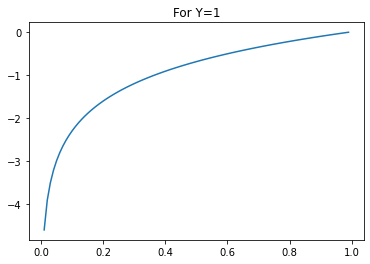

In [17]:
#Visualizing Cost function

x = np.arange(0, 1, 0.01)
plt.plot(x, 1 * np.log(x))
plt.title('For Y=1')
plt.show()

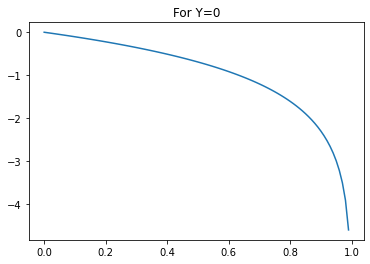

In [18]:
x = np.arange(0, 1, 0.01)
plt.plot(x, 1 * np.log(1 - x))
plt.title('For Y=0')
plt.show()

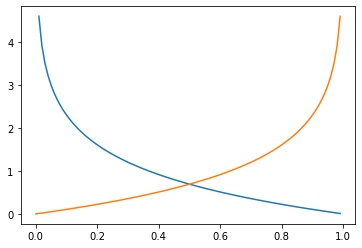

In [19]:
x = np.arange(0, 1, 0.01)
plt.plot(x, -1 * np.log(x))
plt.plot(x, -1 * np.log(1 - x))
plt.show()

In [20]:
Cost = reg.costfunction(initialtheta, X, y)

In [21]:
Cost

0.6931471805599453

In [22]:
test_theta = np.array([-24,0.2,0.2])

In [23]:
Cost = reg.costfunction(test_theta, X, y)

In [24]:
Cost

0.21833019382659782

In [25]:
grad = reg.gradient(X, y, test_theta)

In [26]:
grad

array([0.04290299, 2.56623412, 2.64679737])

In [27]:
#Gradient descent

theta = reg.minimumcost(Cost, initialtheta, X, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [28]:
theta

array([-25.16130062,   0.20623142,   0.20147143])

In [29]:
ypredd = reg.predict(X, theta)
ypredd

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [30]:
reg.score(y, ypredd)

0.89

In [31]:
#Using Sklearn libraries

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

In [32]:
clf.score(X, y)

0.89

In [33]:
#Plotting Decision boundaries

from scipy.optimize import fmin

In [34]:
plot_x = np.array([dt[1].min(), dt[1].max()])
plot_y = -(theta[0]+theta[1]*plot_x)/theta[2]

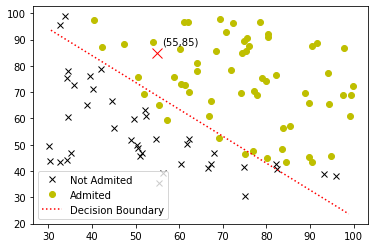

Admission Probability for score (55,85) =  0.9646510915124448


In [35]:
plt.plot(dt[0][dt[2] ==0],dt[1][dt[2] ==0],'kx',label = 'Not Admited')
plt.plot(dt[0][dt[2] ==1],dt[1][dt[2] ==1],'yo',label = 'Admited')
plt.plot(plot_x,plot_y,'r:',label = "Decision Boundary")
plt.plot(55,85,'rx',ms =10)
plt.annotate('(55,85)',xy = (55,85),xytext = (56,88))
plt.legend()
plt.show()

probability = reg.sigmoid(np.dot([1,55,85],theta))
print("Admission Probability for score (55,85) = ",probability)